<a href="https://colab.research.google.com/github/DrizzleAhuja/AIML/blob/main/Label_Encoding_%2C_Feature_Selection%2C_Linear_Reg_%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ["MARITAL STATUS", "SEX", "EDUCATION", "JOB", "USE", "CAR TYPE", "CITY"]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

# Display the first 10 rows of the encoded DataFrame
df.head(10)


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,0,0,0,0,45.703013,0,17430.0,4,7.0,9,42420.0
1,2,50815.44531,0,1,1,8,20.591628,1,18930.0,0,1.0,9,42420.0
2,3,62977.82416,2,0,0,1,33.639949,1,NaN,3,1.0,9,42420.0
3,4,77099.96624,0,0,4,4,15.415676,2,18300.0,4,11.0,9,42420.0
4,5,130794.57420,0,1,1,8,NaN,0,28340.0,1,10.0,9,42420.0
5,6,NaN,2,0,1,3,48.360191,2,6000.0,3,5.0,9,42420.0
6,7,87460.05269,0,1,1,5,45.000488,2,15420.0,0,1.0,9,42420.0
7,8,NaN,1,0,1,0,15.665947,2,11290.0,4,1.0,9,NaN
8,9,NaN,2,0,4,1,26.392961,2,10030.0,3,1.0,9,42420.0
9,10,NaN,1,1,1,0,27.490749,2,NaN,1,NaN,9,42420.0


Data Head:
    feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421
3  0.388250 -0.387127 -0.110229  34.135737
4  1.167882 -0.024104  0.145063  86.663647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   feature3  200 non-null    float64
 3   target    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Data Info:
 None


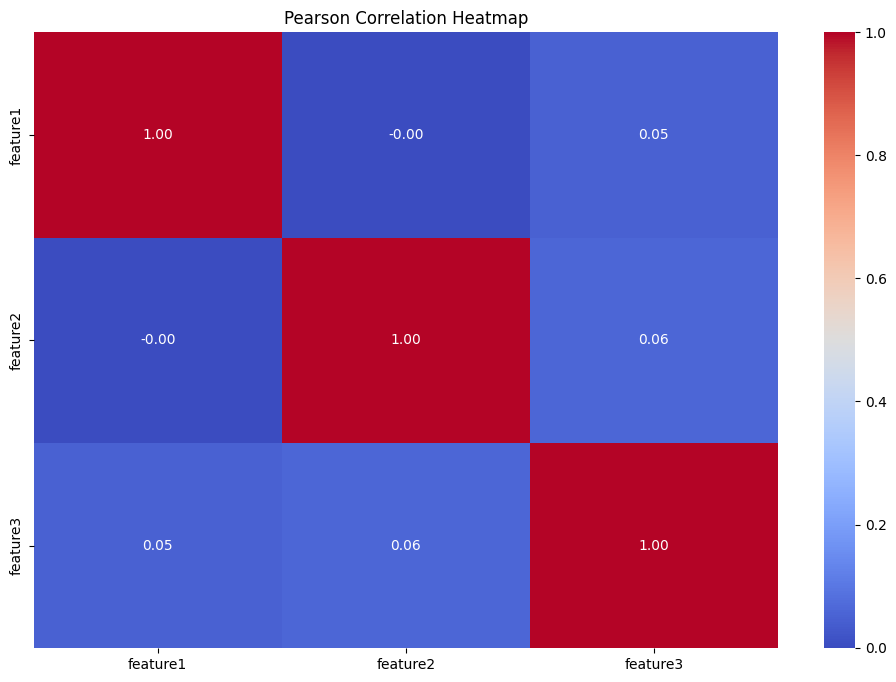


F-Regression Scores:
     Feature     F-Score
0  feature1  403.164147
2  feature3   99.408150
1  feature2    0.193764

Chi-Square Scores:
     Feature  Chi-Square Score
0  feature1         86.286993
2  feature3         35.502011
1  feature2          0.430107

Combined Feature Scores:
     Feature     F-Score  Chi-Square Score
0  feature1  403.164147         86.286993
1  feature3   99.408150         35.502011
2  feature2    0.193764          0.430107


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # If there are missing values

# 1. Load the dataset
data = pd.read_csv('data (2).csv')

# 2. Inspecting the dataset
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())

# 3. Preprocessing
# Assuming the last column is the target variable
target_column = 'target'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Handle categorical variables with Label Encoding (if necessary)
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# 4. Pearson’s Correlation (For continuous variables)
# Compute correlation matrix
correlation_matrix = X.corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

# 5. Feature selection using f_regression (For continuous target and features)
f_test = SelectKBest(score_func=f_regression, k='all')
f_test.fit(X, y)

# Display scores of each feature (f_regression for continuous variables)
f_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_test.scores_})
f_scores = f_scores.sort_values(by='F-Score', ascending=False)
print("\nF-Regression Scores:\n", f_scores)

# 6. Feature selection using Chi-Square (For categorical features)
# StandardScaler doesn't work with chi2, so ensure all values are non-negative
X_non_negative = X.copy()
X_non_negative[X_non_negative < 0] = 0  # Ensure no negative values for chi2

# Convert continuous target into categorical by binning it
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])  # Example of 3 categories
# Apply chi2 now
chi2_test.fit(X_non_negative, y_binned)

# Display Chi-Square scores
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2_test.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi-Square Score', ascending=False)
print("\nChi-Square Scores:\n", chi2_scores)

# 7. Combine both f_regression and chi2 scores
combined_scores = f_scores.merge(chi2_scores, on='Feature')
print("\nCombined Feature Scores:\n", combined_scores)


Data Head:
    feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421
3  0.388250 -0.387127 -0.110229  34.135737
4  1.167882 -0.024104  0.145063  86.663647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   feature3  200 non-null    float64
 3   target    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Data Info:
 None


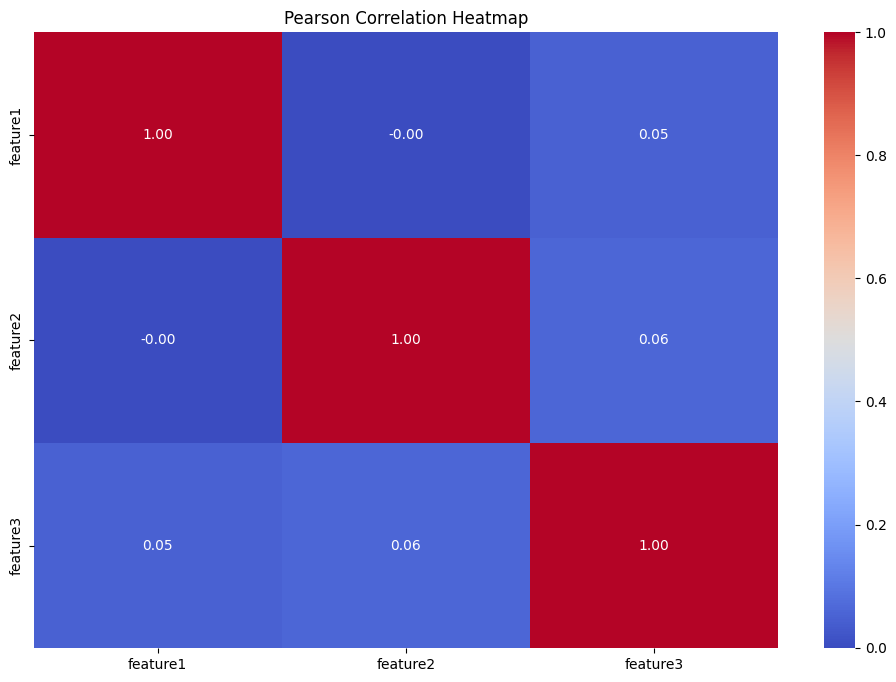


F-Regression Scores:
     Feature     F-Score
0  feature1  403.164147
2  feature3   99.408150
1  feature2    0.193764

Chi-Square Scores:
     Feature  Chi-Square Score
0  feature1         25.274161
2  feature3          3.588795
1  feature2          0.014106

Feature Selection Summary:
     Feature     F-Score  Chi-Square Score
0  feature1  403.164147         25.274161
1  feature3   99.408150          3.588795
2  feature2    0.193764          0.014106


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the dataset
data = pd.read_csv('data (2).csv')

# 2. Inspecting the dataset
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())

# 3. Preprocessing
# Assuming the last column is the target variable
target_column = 'target'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Handle categorical variables with Label Encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize the data (for Chi-Square test)
X_non_negative = StandardScaler().fit_transform(X)
X_non_negative = np.abs(X_non_negative)  # Ensure non-negative values for Chi-Square

# 4. Pearson’s Correlation for continuous features
correlation_matrix = X.corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

# 5. Feature selection using f_regression (for continuous target and features)
f_test = SelectKBest(score_func=f_regression, k='all')
f_test.fit(X, y)

# Display F-Regression scores for each feature
f_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_test.scores_})
f_scores = f_scores.sort_values(by='F-Score', ascending=False)
print("\nF-Regression Scores:\n", f_scores)

# 6. Feature selection using Chi-Square (for categorical features)
# If your target variable is continuous, convert it to categories for Chi-Square
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])  # Bin into 3 categories

# Apply SelectKBest with chi2
chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(X_non_negative, y_binned)

# Display Chi-Square scores for each feature
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2_test.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi-Square Score', ascending=False)
print("\nChi-Square Scores:\n", chi2_scores)

# Summary: Display both f_regression and chi2 results together
feature_selection_summary = pd.merge(f_scores, chi2_scores, on='Feature', how='inner')
print("\nFeature Selection Summary:\n", feature_selection_summary)


Accuracy: 0.8
Confusion Matrix:
[[ 5  0  1]
 [ 0  3  3]
 [ 3  1 24]]
Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.83      0.71         6
         Low       0.75      0.50      0.60         6
      Medium       0.86      0.86      0.86        28

    accuracy                           0.80        40
   macro avg       0.74      0.73      0.72        40
weighted avg       0.81      0.80      0.80        40



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('data.csv')
print(df.columns)

# Use 'feature1' as the input feature and 'target' as the output variable
X = df[['feature1']]  # Independent variable
y = df['target']      # Dependent variable (target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Index(['feature1', 'feature2', 'feature3', 'target'], dtype='object')
MAE: 36.292809335325025
MSE: 2168.3167352031974
RMSE: 46.56518801855306
R²: 0.7464445989713446


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data.csv')

# Select multiple features (independent variables) and the target (dependent variable)
X = df[['feature1', 'feature2', 'feature3']]  # Example: multiple features
y = df['target']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 16.07181470901184
MSE: 367.6356674306212
RMSE: 19.17382766769904
R²: 0.957009966498703


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('data.csv')

# Define features (X) and target (y)
X = df[['feature1', 'feature2', 'feature3']]

# Convert the continuous target variable into categories
y = pd.cut(df['target'], bins=3, labels=['Low', 'Medium', 'High'])  # Example binning

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN Classifier (choose k=5, for example)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8
Confusion Matrix:
[[ 5  0  1]
 [ 0  3  3]
 [ 3  1 24]]
Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.83      0.71         6
         Low       0.75      0.50      0.60         6
      Medium       0.86      0.86      0.86        28

    accuracy                           0.80        40
   macro avg       0.74      0.73      0.72        40
weighted avg       0.81      0.80      0.80        40

